In [1]:
import os
import pandas as pd
import requests
import seaborn as sns
from sklearn import preprocessing

In [2]:
for dirname, _, filenames in os.walk("inputs/"):
        for filename in filenames:
            print(filename)

sample_submission.csv
diamonds-datamad0820.zip
train.csv
predict.csv


In [3]:
train_data = pd.read_csv('inputs/train.csv', index_col=0)
train_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [4]:
train_data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
train_data.cut.value_counts()

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

In [6]:
train_data.color.value_counts()

G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

In [7]:
train_data.clarity.value_counts()

SI1     9806
VS2     9204
SI2     6865
VS1     6099
VVS2    3778
VVS1    2776
IF      1365
I1       562
Name: clarity, dtype: int64

In [8]:
train_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
train_data_correlation = train_data.copy()
train_data_correlation.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [10]:
le = preprocessing.LabelEncoder()
train_data_correlation["color2"]=le.fit_transform(train_data["color"])
train_data_correlation["cut2"]= le.fit_transform(train_data["cut"])
train_data_correlation["clarity2"]= le.fit_transform(train_data["clarity"])
train_data_correlation.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,color2,cut2,clarity2
id,,,,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363,4,3,2
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593,1,4,3
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534,0,4,3
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212,1,2,4
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447,2,4,3


,carat,depth,table,x,y,z,price,color2,cut2,clarity2
carat,1.000000,0.028899,0.178948,0.974698,0.944318,0.947809,0.920994,0.290270,0.018654,-0.215731
depth,0.028899,1.000000,-0.298248,-0.025145,-0.029319,0.094562,-0.009756,0.045644,-0.194890,-0.052483
table,0.178948,-0.298248,1.000000,0.193161,0.179688,0.146999,0.125868,0.024696,0.156817,-0.084450
x,0.974698,-0.025145,0.193161,1.000000,0.967194,0.965231,0.884080,0.268739,0.023197,-0.227692
y,0.944318,-0.029319,0.179688,0.967194,1.000000,0.940881,0.858680,0.259930,0.028172,-0.218013
z,0.947809,0.094562,0.146999,0.965231,0.940881,1.000000,0.856299,0.264584,0.002761,-0.224615
price,0.920994,-0.009756,0.125868,0.884080,0.858680,0.856299,1.000000,0.170355,0.043197,-0.071126
color2,0.290270,0.045644,0.024696,0.268739,0.259930,0.264584,0.170355,1.000000,-0.003245,-0.030241
cut2,0.018654,-0.194890,0.156817,0.023197,0.028172,0.002761,0.043197,-0.003245,1.000000,0.030233
clarity2,-0.215731,-0.052483,-0.084450,-0.227692,-0.218013,-0.224615,-0.071126,-0.030241,0.030233,1.000000


<AxesSubplot:>

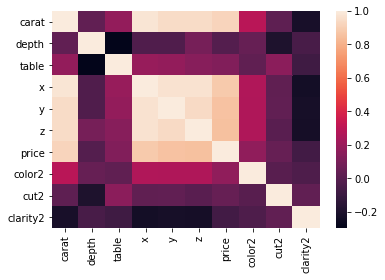

In [11]:
display(train_data_correlation.corr())
sns.heatmap(train_data_correlation.corr())

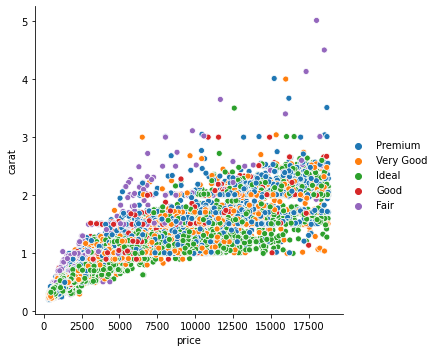

In [12]:
sns.relplot(data = train_data[["price","carat","cut","color"]],x="price", y="carat",hue=train_data["cut"].tolist())

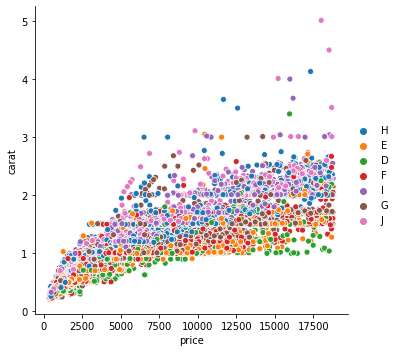

In [13]:
sns.relplot(data = train_data[["price","carat","color"]],x="price", y="carat", hue= train_data["color"].tolist())

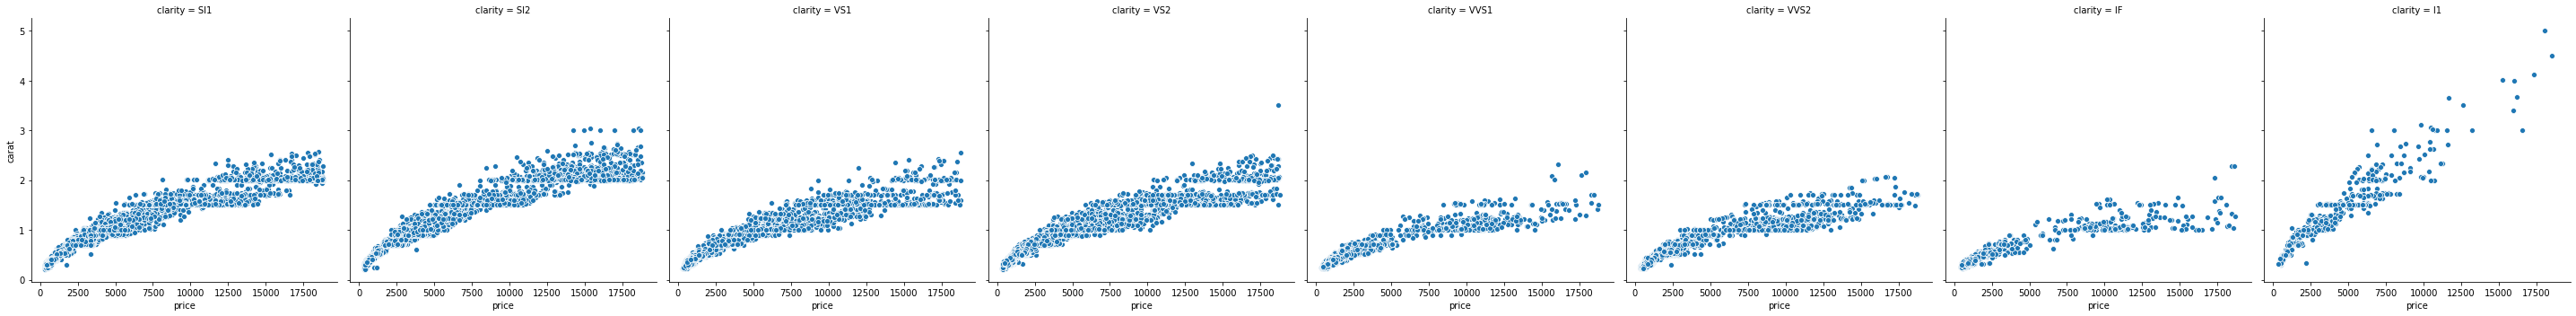

In [14]:
sns.relplot(data = train_data[["price","carat","clarity"]],x="price", y="carat", col= "clarity")

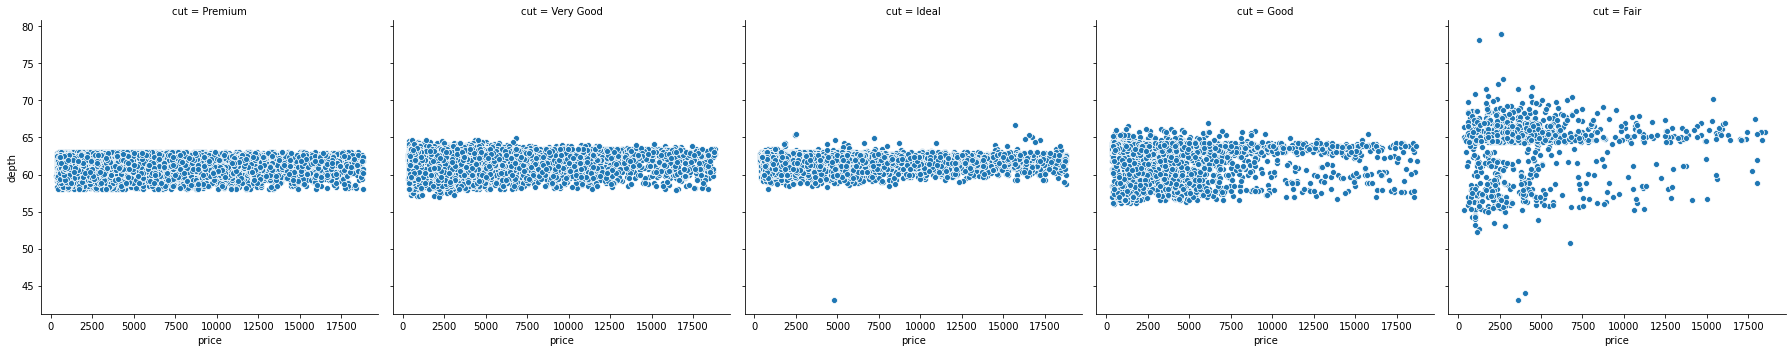

In [15]:
sns.relplot(data = train_data[["price","depth","cut"]],x="price", y="depth",col ="cut")

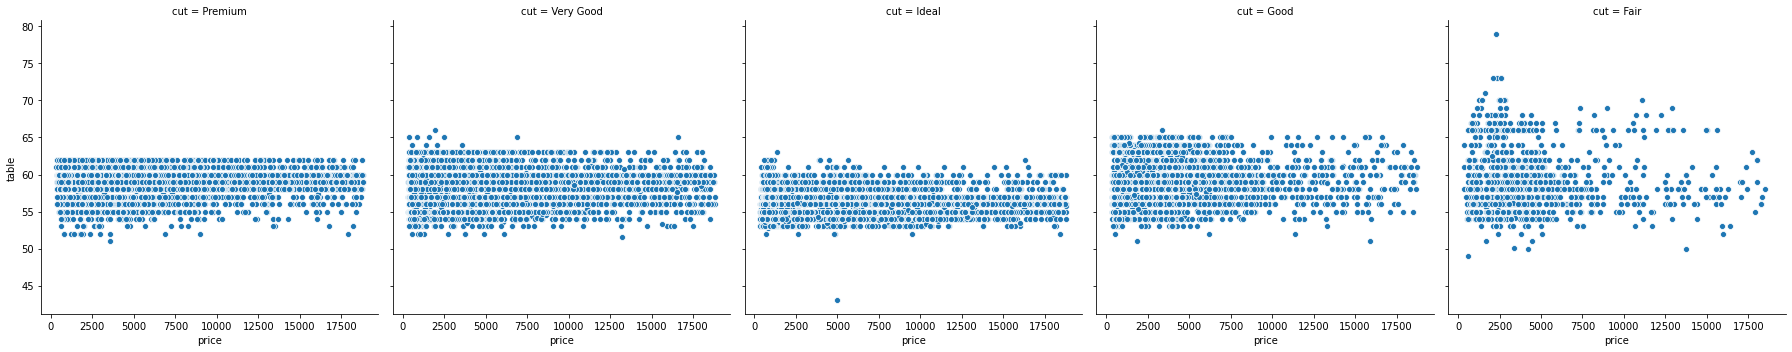

In [16]:
sns.relplot(data = train_data[["price","table","cut"]],x="price", y="table",col ="cut")

In [17]:
train_data_correlation.to_csv("output/train_all.csv")
train_data_correlation[["price","carat","x","y","z","color2","clarity2","cut2"]].to_csv("output/train_some.csv")

In [18]:
train_data_correlation

,carat,cut,color,clarity,depth,table,x,y,z,price,color2,cut2,clarity2
id,,,,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363,4,3,2
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593,1,4,3
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534,0,4,3
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212,1,2,4
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.90,Good,D,SI1,63.8,58.0,6.13,6.09,3.90,4120,0,1,2
40451,0.35,Ideal,D,VVS1,62.0,54.0,4.56,4.57,2.83,1266,0,2,6
40452,0.90,Good,G,SI2,58.4,55.0,6.34,6.39,3.72,3269,3,1,3
